# Testing our neural style transfer script

In this notebook, we'll simply test our neural style transfer script. The script we're using is from [here](https://github.com/pytorch/examples/tree/master/fast_neural_style) originally and is based off the work from [this](https://arxiv.org/abs/1603.08155) paper.

---

In [1]:
import torch 
from IPython.display import Image

Make an output and content directory.

In [2]:
!mkdir content_dir && mkdir output_dir

mkdir: cannot create directory ‘content_dir’: File exists


Download an image to apply style transfer to. The image is downloaded to the `content_dir` that we just created.

In [3]:
!wget https://learnanalytics.microsoft.com/media/brand-central3.jpg -O content_dir/human.jpg

--2018-12-18 16:27:03--  https://learnanalytics.microsoft.com/media/brand-central3.jpg
Resolving learnanalytics.microsoft.com (learnanalytics.microsoft.com)... 104.40.84.133
Connecting to learnanalytics.microsoft.com (learnanalytics.microsoft.com)|104.40.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166225 (162K) [image/jpeg]
Saving to: ‘content_dir/human.jpg’

content_dir/human.j 100%[===================>] 162.33K   629KB/s    in 0.3s    

2018-12-18 16:27:04 (629 KB/s) - ‘content_dir/human.jpg’ saved [166225/166225]



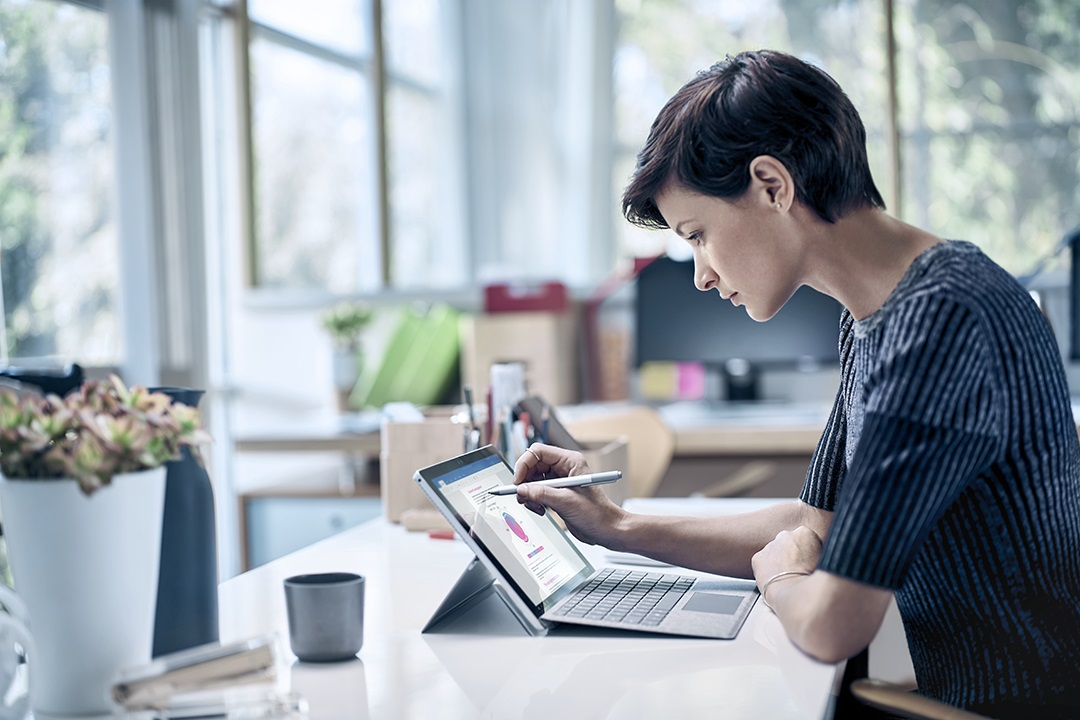

In [4]:
im = Image(filename="content_dir/human.jpg", width=600)
display(im)

Apply style transfer using the style transfer script under `/aks/style_transfer.py`.

- `--model-dir` - the model directory where all the model files are saved
- `--cuda` - 1 to use GPU, 0 to use CPU
- `--content-dir` - the directory of input images
- `--output-dir` - the directory to save output images

In [5]:
!python scoring_app/style_transfer.py \
    --model-dir models \
    --cuda {1 if torch.cuda.is_available() else 0} \
    --content-dir content_dir \
    --output-dir output_dir

2018-12-18 16:27:06,306 [root:style_transfer.py:251] DEBUG - Starting neural style transfer...
2018-12-18 16:27:09,908 [root:style_transfer.py:145] DEBUG - Processing content_dir/human.jpg
/home/jiata/anaconda3/envs/batchscoringdl/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


Check that there is something in the `output_dir`.

In [6]:
!ls output_dir

human.jpg


Display the output image.

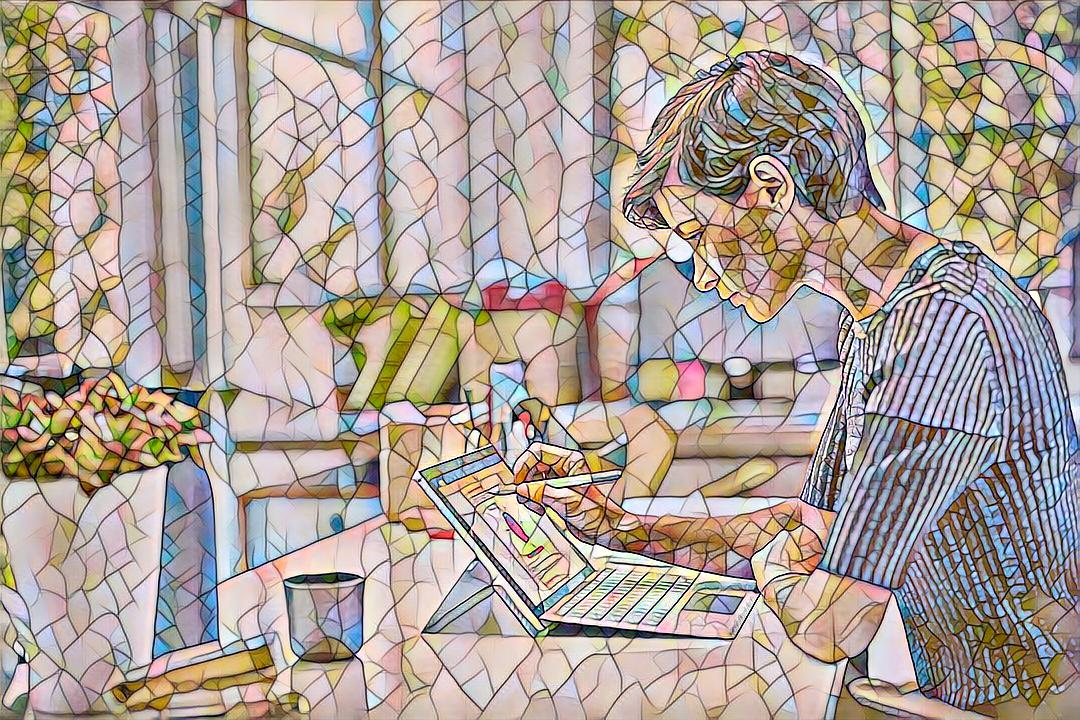

In [7]:
im = Image(filename="output_dir/human.jpg", width=600)
display(im)

Continue to the next [notebook](/notebooks/01_setup_azure.ipynb).